In [299]:
import sys
sys.path.append('/path/to/root')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from statsmodels.tsa.stattools import acf, pacf
import warnings
warnings.filterwarnings("ignore")
from pandas import Int64Index as NumericIndex


from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler



In [300]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta
import calendar

In [301]:
data = pd.read_csv("/Users/gulnihal/Desktop/births2015/Births2015.csv")

#data["mean2"]=data["births"].rolling(window=2).mean().shift(1)
data["max2"]=data["births"].rolling(window=2).max().shift(1)
data["lag7"] = data["births"].shift(7)
data["mean4"]=data["births"].rolling(window=4).mean().shift(1)
data["mean3"]=data["births"].rolling(window=3).mean().shift(1)
data["std2"]=data["births"].rolling(window=2).std().shift(1)
data["lag1"] = data["births"].shift(1)
#data["max3"]=data["births"].rolling(window=3).max().shift(1)
data["min2"]=data["births"].rolling(window=2).min().shift(1)
data["min3"]=data["births"].rolling(window=3).min().shift(1)
data["min4"]=data["births"].rolling(window=4).min().shift(1)
data["min5"]=data["births"].rolling(window=5).min().shift(1)


data = data.dropna()
data = data.drop(["Unnamed: 0"],axis=1)


In [302]:
train = data[:335]
test = data[335:]

train = data[:335]
test = data[335:]
x_train = train.drop(columns=["date","births","wday"])
y_train = train["births"]
x_test=test.drop(columns=["date","births","wday"])
y_test=test["births"]

In [303]:
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()

tran_x_train = stds.fit_transform(x_train)
tran_y_train = stds.fit_transform(y_train.to_numpy().reshape(-1, 1))
tran_x_test = stds.fit_transform(x_test)
tran_y_test = stds.fit_transform(y_test.to_numpy().reshape(-1, 1))

In [304]:
regressor = SVR(kernel = "rbf")
regressor.fit(tran_x_train,tran_y_train)

SVR()

In [305]:
tran_pred_y = regressor.predict(tran_x_test)

In [306]:
y_pred = stds.inverse_transform(tran_pred_y.reshape(-1, 1) )

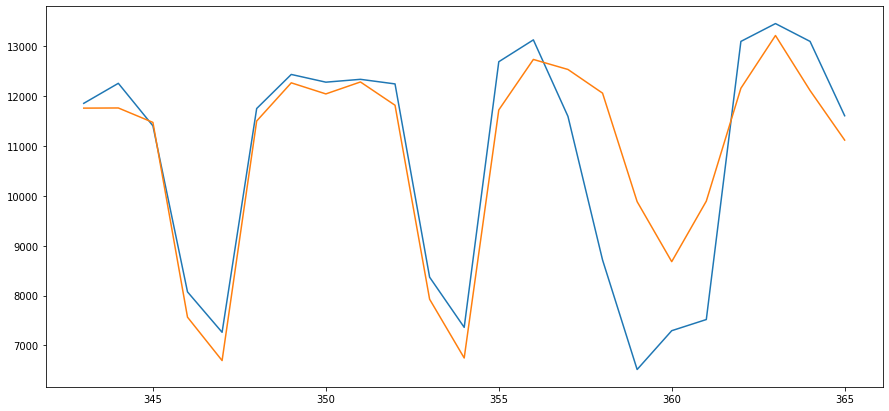

In [310]:
plt.figure(figsize=(15,7))
plt.plot(x_test["day_of_year"],y_test)
plt.plot(x_test["day_of_year"],y_pred)

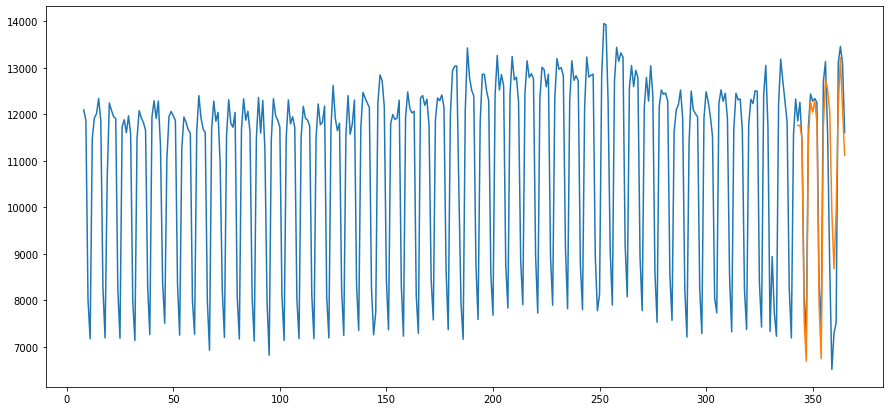

In [307]:


plt.figure(figsize=(15,7))
plt.plot(data["day_of_year"],data["births"])
plt.plot(x_test["day_of_year"],y_pred)


In [308]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE(y_test.to_numpy().reshape(-1,1),y_pred)

9.681988263325197